# Demo:  Kernels

SVMs are commonly used with kernels to enable non-linear classification.  In this demo, we show how to:
* Visualize kernel functions, particularly the radial basis function (RBF)
* Visualize decision function or linear discriminant of the SVM as a sum of the kernels
* Visualize the role of the width in the kernel on the decision boundaries

We begin by importing common packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## SVM Theory

Consider an SVM classifier trained on data points `xtr[i], ytr[i]`, `i=0,...,ntr-1` with binary labels, `ytr[i] = -1` or `1`.   Then, given a new data point `x`, the classifier output is given by:

    z = b + sum_i alpha[i]*ytr[i]*K(xtr[i], x)
    yhat = sign(z)
    
The values `alpha[i] >= 0` are called the *dual coefficients* and `b` is the intercept.  Both `alpha[i]` and `b` are found from training to minimize the SVM cost function.  As discussed in class, this function includes both the hinge loss and margin.  

The function `K(xtr,x)` is the *kernel* and `z` is called the *decision function* or *linear discriminant*.  Two common kernels are:

* Linear kernel:  `K(xtr,x) = xtr.dot(x)` 
* RBF kernel:  `K(xtr,x) = exp(-gam*||xtr-x||^2)` 

In this demo, we will focus on the RBF kernel.

## Kernels in 1D

In the 1D case, the RBF kernel 

    K(xtr,x) = exp(-gam*(xtr-x)**2)
    
is the standard Gaussian bell curve centered at `x=xtr` with width `1/gamma`.  We plot it for a few values to illustrate.

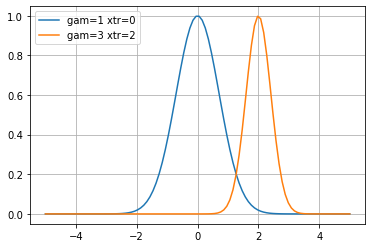

In [2]:
gam_plot = [1,3]
xtr_plot = [0,2]
x = np.linspace(-5,5,100)
leg_str = []
for gam, xtr in zip(gam_plot, xtr_plot):
    ker = np.exp(-gam*(x-xtr)**2)
    plt.plot(x, ker)
    leg = 'gam=%d xtr=%d' % (gam, xtr)
    leg_str.append(leg)
plt.grid()
plt.legend(leg_str)
    

We first plot the decision function and classifier on some simple 1D training data.

In [3]:
xtr = np.array([-1,0,1,2,3,5])
ytr = np.array([-1,-1,1,-1,1,1])
ntr = len(xtr)

Given data `xtr` and `ytr`, the decision function `z` is given by:

    z = b + sum_i alpha[i]*ytr[i]*exp(-gam*(xtr[i]-x)**2)
    
This is a linear combination of Gaussians centered at `xtr[i]` with weights `alpha[i]*ytr[i]`.  The classification decision is then `yhat = sign(z)`.  To illustrate this, we plot `z` and `yhat` as a function of `x` for the cases where:

* `alpha[i]=1` for all `i` 
* `b=0`.  

We see that the function `z` is a smooth approximation of the data `(xtr,ytr)`.  The level of the smoothness depends on `gamma`.  Selecting higher `gamma`, makes `z` less smooth and less its fit the training data better.  This will cause less bias in the estimate but greater variance.

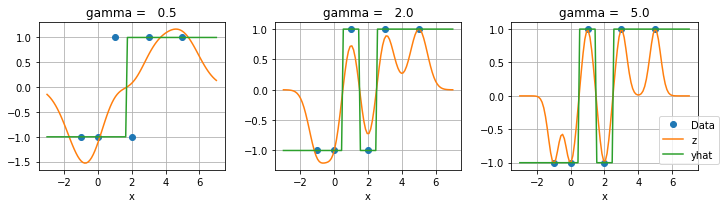

In [4]:
# x test values to plot
xp = np.linspace(-3,7,100)

# gamma values to plot
gam_plot = [0.5,2,5]
nplot = len(gam_plot)

# Other parameters
alpha = np.ones(ntr)
b = 0

fig, ax = plt.subplots(1,nplot,figsize=(10,3))

for i, gam in enumerate(gam_plot):
    # Computer kernel
    ker = np.exp(-gam*((xp[:,None] - xtr[None,:])**2))
    
    # Compute decision function and yhat
    z = ker.dot(ytr*alpha)
    yhat = np.sign(z)
    
    # Plot
    ax[i].plot(xtr, ytr,'o')    
    ax[i].plot(xp, z)    
    ax[i].plot(xp, yhat)
    ax[i].grid()
    ax[i].set_xlabel('x')
    title = 'gamma = %5.1f' % gam
    ax[i].set_title(title)
    
fig.legend(['Data','z','yhat'], borderaxespad=0.1, loc='lower right',
           bbox_to_anchor=(0, 0.2, 1, 0.8))
plt.tight_layout()

In the above example, we plotted `z` for made up values of `alpha`. We can plot the decision function from the values from fitting a SVC model as follows.  We see we obtain similar shapes when we fit the data.

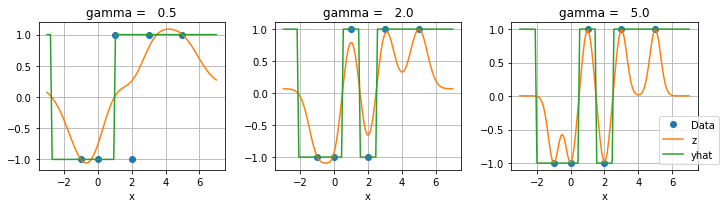

In [5]:
fig, ax = plt.subplots(1,nplot,figsize=(10,3))

for i, gam in enumerate(gam_plot):
    # Fit the SVC
    svc = SVC(C=1,kernel='rbf',gamma=gam)
    svc.fit(xtr[:,None],ytr)
    
    # Compute decision function and yhat
    z = svc.decision_function(xp[:,None])
    yhat = np.sign(z)    
    
    # Plot
    ax[i].plot(xtr, ytr,'o')    
    ax[i].plot(xp, z)    
    ax[i].plot(xp, yhat)
    ax[i].grid()
    ax[i].set_xlabel('x')
    title = 'gamma = %5.1f' % gam
    ax[i].set_title(title)
    
fig.legend(['Data','z','yhat'], borderaxespad=0.1, loc='lower right',
           bbox_to_anchor=(0, 0.2, 1, 0.8))
plt.tight_layout()


## Kernel in 2D

Now we consider a 2D case.  We use the following simple data points.

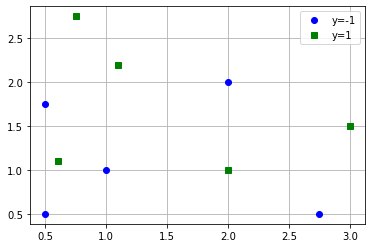

In [6]:
Xtr = np.array([[0.5,0.5], [0.6,1.1], [1,1],[0.5,1.75], [2.75,0.5],[2,2], [0.75,2.75], [1.1,2.2], [2,1], [3,1.5]])
ytr = np.array([-1,1,-1,-1,-1,-1,1,1,1,1])

I0 = np.where(ytr==-1)[0]
I1 = np.where(ytr==1)[0]
plt.plot(Xtr[I0,0], Xtr[I0,1],'bo')
plt.plot(Xtr[I1,0], Xtr[I1,1],'gs')
plt.grid()
plt.legend(['y=-1', 'y=1'])

To plot the decision functions we create a set of points on a grid to plot the functions.

In [7]:
n0 = 100
n1 = 100
xmax = 3
x0p = np.linspace(0,xmax,n0)
x1p = np.linspace(0,xmax,n1)
xmat0, xmat1 = np.meshgrid(x0p, x1p)

Xp = np.column_stack((xmat0.ravel(), xmat1.ravel()))

We now fit the SVM for different values of `gamma`.  For each value, we plot the linear discriminant `z` and classification decision `yhat` as a function of `x`.  We see that as `gamma` increases the `z` begins to fit the data better.  

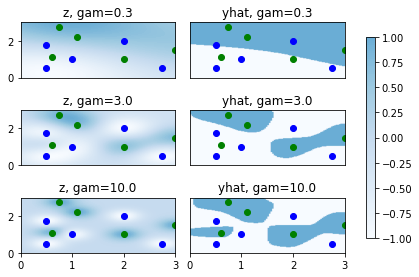

In [8]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

blue_map = cm.get_cmap('Blues')
light_map = ListedColormap(blue_map(np.linspace(0,0.5,100)))

gam_test = [0.3,3, 10]
ngam = len(gam_test)
fig, ax = plt.subplots(ngam,2)

for irow, gam in enumerate(gam_test):
    # Fit the SVC
    svc = SVC(C=1,kernel='rbf',gamma=gam)
    svc.fit(Xtr, ytr)
    
    # Compute decision function and yhat
    z = svc.decision_function(Xp)
    yhat = np.sign(z)    
    
    # Plot
    for icol, yp in enumerate([z,yhat]):
        ymat = yp.reshape((n0,n1))

        im = ax[irow,icol].imshow(np.flipud(ymat), extent=[0,xmax,0,xmax],\
                                  aspect='auto', cmap=light_map)
        
        ax[irow,icol].plot(Xtr[I0,0], Xtr[I0,1],'bo')
        ax[irow,icol].plot(Xtr[I1,0], Xtr[I1,1],'go')
        if icol == 1:
            title = 'yhat, gam=%3.1f' % gam
            ax[irow,icol].set_yticks([])
        else:
            title = 'z, gam=%3.1f' % gam
        ax[irow,icol].set_title(title)
        if irow < ngam-1:
            ax[irow,icol].set_xticks([])
        
fig.tight_layout()
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.85) 
cb_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
plt.colorbar(im, cax=cb_ax)        